In [1]:
from pycaret.classification import *
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
os.chdir('/home/antoine/gene_pheno_pred')
os.environ["CUDA_VISIBLE_DEVICES"]="1"


In [2]:
# Load training set
train = pd.read_csv('/home/antoine/gene_pheno_pred/ComplEx_2023-05-17_18-04-22_train.csv' , header=0)
test = pd.read_csv('/home/antoine/gene_pheno_pred/ComplEx_2023-05-17_18-04-22_test.csv' , header=0)
val = pd.read_csv('/home/antoine/gene_pheno_pred/ComplEx_2023-05-17_18-04-22_val.csv' , header=0)

# add column to identify train, test and val
train['set'] = 'train'
test['set'] = 'test'
val['set'] = 'val'

# Merge train, test and val
df = pd.concat([train, test, val], axis=0)

# drop ground truth and link col
df = df.drop(['ground_truth'], axis=1)

df

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,set
0,-0.039281,0.045129,0.060632,0.040718,0.019589,-0.037644,-0.046621,0.035634,-0.036399,0.040565,...,0.001885,0.048025,0.031555,-0.031849,-0.014078,0.053716,-0.064128,-0.030465,-0.024128,train
1,-0.036916,0.028429,0.049426,0.027237,-0.035879,-0.043270,-0.047764,0.030260,-0.019672,0.043986,...,-0.047990,0.053235,0.036724,0.048768,0.003633,-0.035456,-0.047571,0.012309,-0.046372,train
2,-0.045044,-0.040876,0.053277,-0.023103,-0.040964,-0.057454,-0.043918,0.036199,-0.010271,0.061459,...,-0.027327,0.051839,0.048165,-0.043459,-0.050535,-0.030699,-0.040411,-0.003266,-0.021388,train
3,-0.185021,0.170344,-0.216889,-0.203051,-0.165906,0.221980,0.152171,0.172068,-0.212461,-0.209708,...,0.209200,-0.215327,-0.212621,-0.205381,-0.211254,0.199636,-0.207717,-0.214102,0.211480,train
4,-0.037551,0.039643,0.025630,-0.039976,0.007117,-0.040056,-0.035566,0.048091,-0.042153,0.026733,...,-0.020139,-0.004194,-0.028268,0.029635,-0.042946,0.049204,0.029149,-0.030395,-0.041650,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234191,0.053616,-0.010338,0.054068,-0.054630,0.033612,-0.074185,-0.056169,0.043632,0.049982,0.065148,...,-0.002887,0.007249,0.027118,-0.006408,0.018064,0.011075,-0.000410,0.022717,0.032426,val
234192,0.059236,-0.030084,0.070195,-0.059798,-0.069581,-0.075291,-0.063509,-0.033916,-0.029080,0.071954,...,0.068665,0.051774,-0.054903,-0.031336,-0.060177,0.069443,-0.076120,-0.030139,0.058012,val
234193,-0.018654,-0.019158,0.009537,-0.006379,0.017037,-0.006890,-0.028761,-0.017385,0.020085,0.022891,...,-0.012730,0.020308,0.034114,-0.025278,0.003062,0.020570,-0.007069,0.039509,0.040183,val
234194,-0.045248,0.124431,-0.166019,-0.034602,-0.153778,0.156033,0.153976,0.117537,-0.163683,-0.165206,...,0.020264,0.035035,0.018661,-0.024460,-0.003234,0.029622,-0.009954,0.008429,0.025477,val


In [3]:
# split combined embeddings into individual nodes
df1 = df.iloc[:, :100] # Head node
df2 = df.iloc[:, 100:200] # Tail node

# add the ground_truth col
df1['set'] = df['set']
df2['set'] = df['set']

# drop indexes
df1 = df1.reset_index(drop=True)
df2 = df2.reset_index(drop=True)

# rename columns of df2 to be the same as df1
df2.columns = df1.columns

# merge the two dataframes
df = pd.concat([df1, df2], axis=0)

# Replace 'ground_truth' col by its natural language meaning
df = df.drop_duplicates()

df

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,set
0,-0.039281,0.045129,0.060632,0.040718,0.019589,-0.037644,-0.046621,0.035634,-0.036399,0.040565,...,-0.048659,0.048578,0.049714,0.049720,-0.037400,-0.041995,-0.043189,0.019707,-0.011275,train
1,-0.036916,0.028429,0.049426,0.027237,-0.035879,-0.043270,-0.047764,0.030260,-0.019672,0.043986,...,-0.041035,0.056026,0.044111,-0.030228,-0.000461,-0.042661,-0.042689,0.047804,0.001308,train
2,-0.045044,-0.040876,0.053277,-0.023103,-0.040964,-0.057454,-0.043918,0.036199,-0.010271,0.061459,...,-0.006611,0.060048,0.041527,0.000094,-0.044123,0.041733,-0.054082,0.041215,-0.038703,train
3,-0.185021,0.170344,-0.216889,-0.203051,-0.165906,0.221980,0.152171,0.172068,-0.212461,-0.209708,...,-0.178775,-0.182236,-0.190973,0.083386,0.007624,-0.135215,-0.024115,0.182624,-0.197361,train
4,-0.037551,0.039643,0.025630,-0.039976,0.007117,-0.040056,-0.035566,0.048091,-0.042153,0.026733,...,-0.036329,0.045488,0.043615,0.031605,0.042898,-0.035605,-0.043298,0.020484,-0.012389,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2831884,-0.023892,-0.007292,0.019950,-0.032524,0.012775,-0.012589,-0.017113,-0.043236,0.023969,0.038331,...,-0.020676,0.019097,0.023040,-0.014981,0.015769,0.003728,-0.016990,0.021989,0.029805,val
2831959,0.036999,-0.042714,0.015506,0.044485,-0.042452,0.022971,0.042837,-0.049200,-0.015079,-0.018622,...,0.001816,0.006817,-0.040872,0.035185,-0.036047,0.020074,0.026024,-0.029519,0.033833,val
2832259,-0.039206,-0.052511,0.011081,-0.078264,-0.067643,-0.091277,0.081249,-0.072161,-0.054926,-0.001652,...,0.082020,0.076846,-0.044186,-0.077276,-0.061867,0.085800,0.079363,-0.074058,0.080833,val
2832356,0.005754,-0.037897,0.014409,-0.023715,0.030995,-0.004737,-0.015752,-0.051217,0.037177,0.038536,...,0.005661,0.017977,0.012613,-0.033657,0.013853,-0.003615,-0.011307,0.010223,0.029038,val


In [4]:
from sklearn.manifold import TSNE

numeric_cols = df.drop(['set'], axis=1)  # Exclude 'ground_truth' and 'link' columns
tsne = TSNE(n_components=2)  # Specify the number of components you want to keep
tsne_result = tsne.fit_transform(numeric_cols)
df_tsne = pd.DataFrame(data=tsne_result, columns=['TSNE1', 'TSNE2'])

In [9]:

df_tsne = df_tsne.reset_index(drop=True)
df = df.reset_index(drop=True)
df_tsne['set'] = df['set']

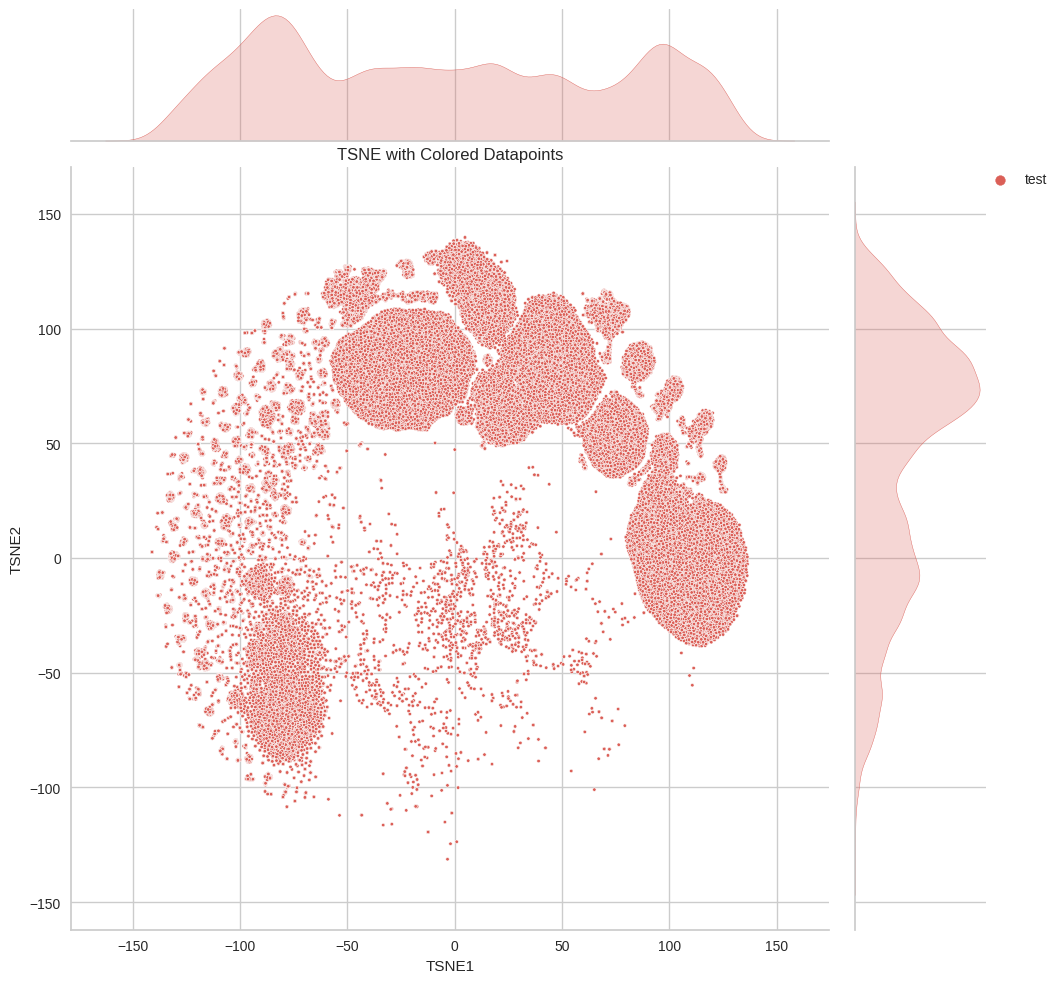

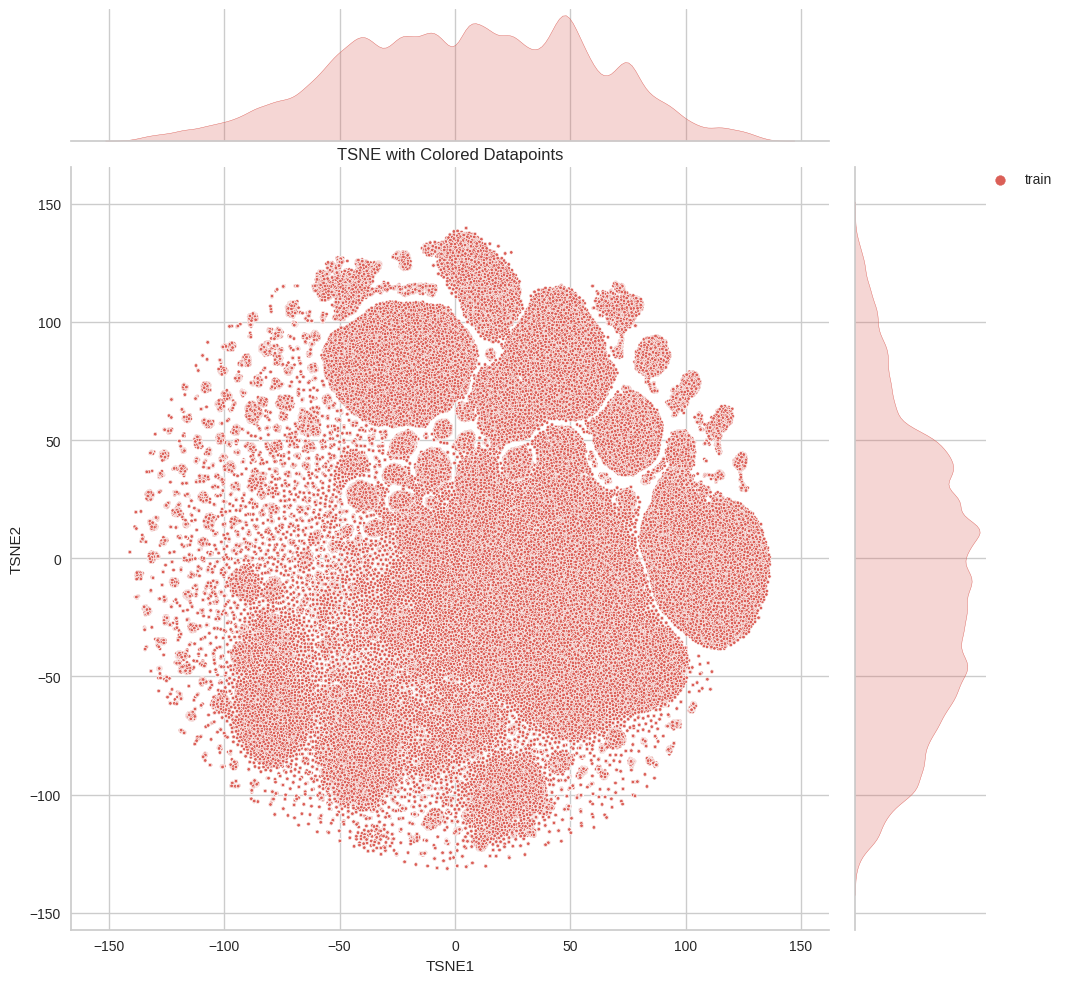

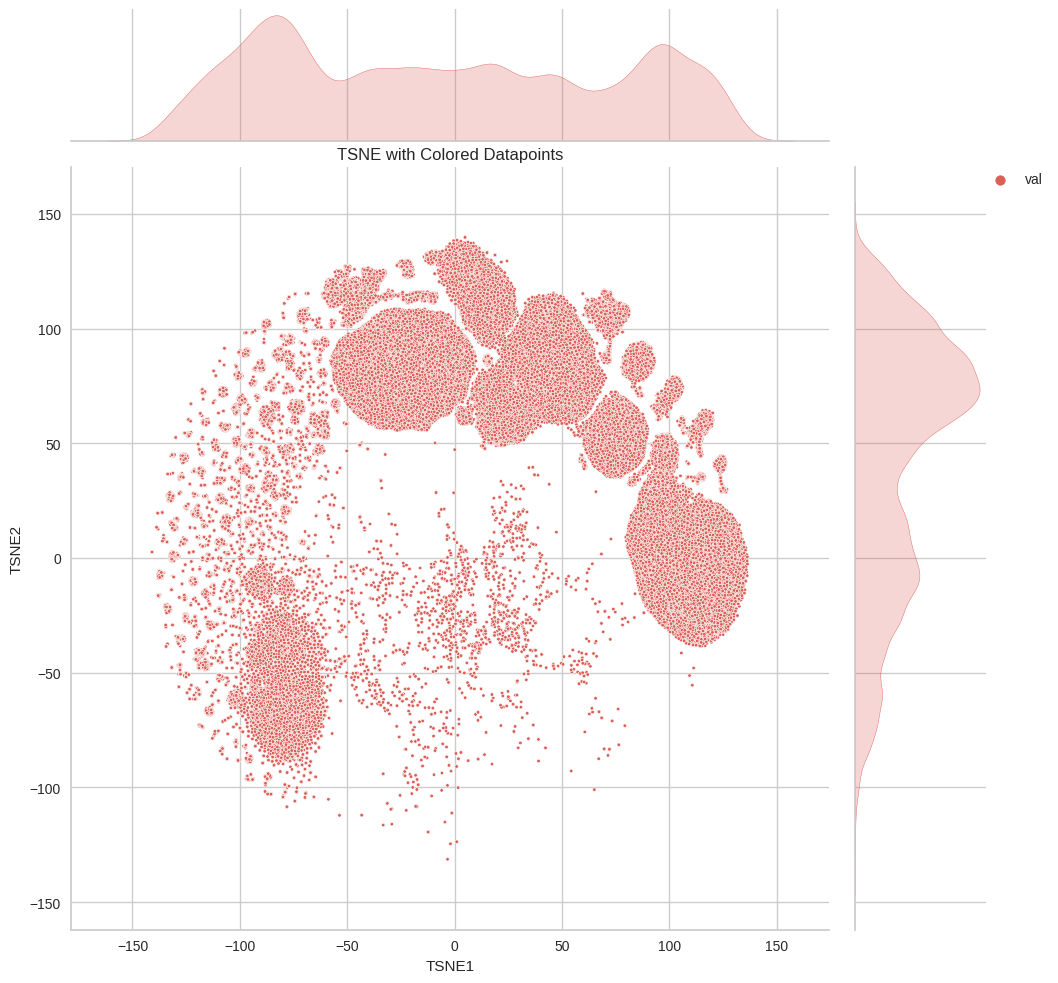

In [13]:
# Group the DataFrame based on the 'Set' column
grouped = df_tsne.groupby('set')

# Access each group separately
for group_name, group_data in grouped:
    g = sns.jointplot(data=group_data, x='TSNE1', y='TSNE2', hue='set', palette='hls', height=10, ratio=5, marker=".", s=25)
    g.set_axis_labels('TSNE1', 'TSNE2')

    # Legend outside the plot
    plt.legend(bbox_to_anchor=(1.2, 1), loc=2, borderaxespad=0.)
    plt.title('TSNE with Colored Datapoints')
    plt.show()

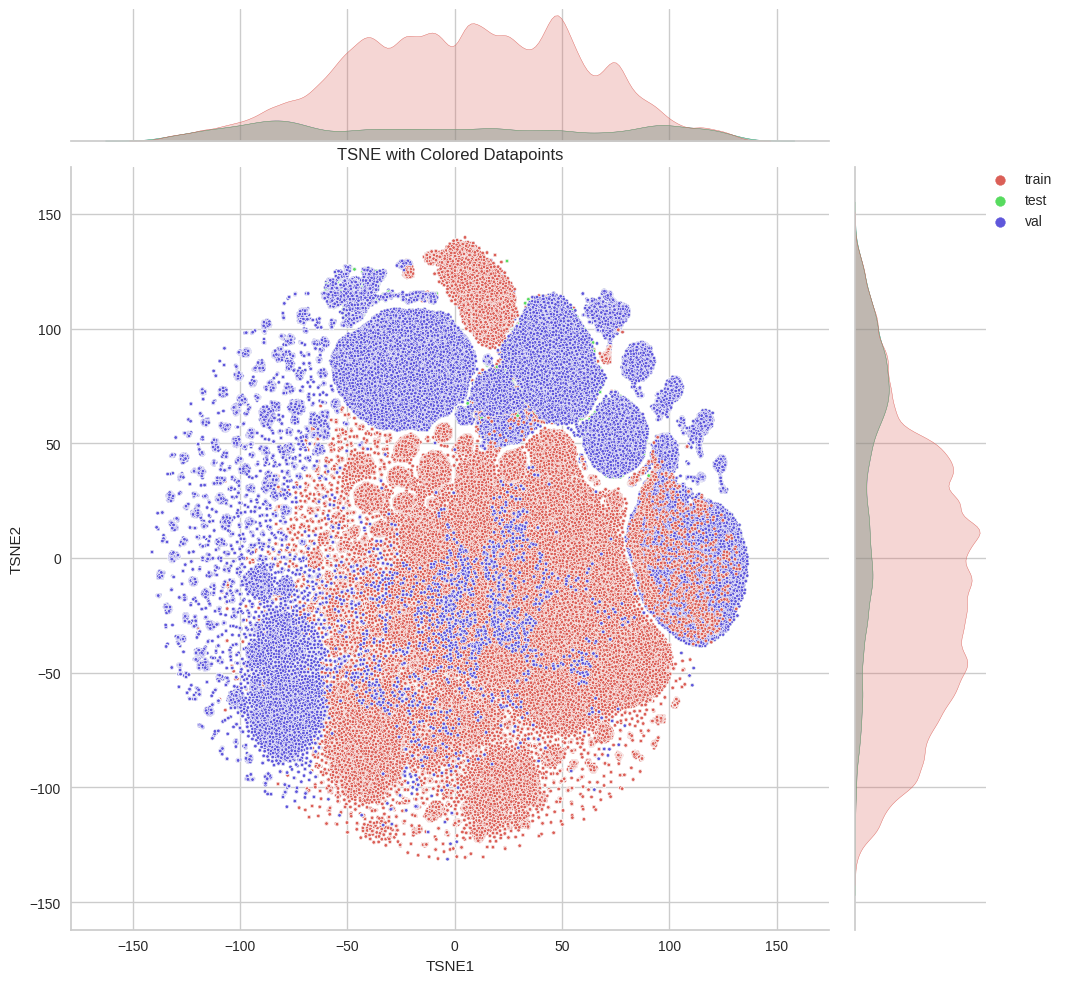

In [11]:
g = sns.jointplot(data=df_tsne, x='TSNE1', y='TSNE2', hue='set', palette='hls', height=10, ratio=5, marker=".", s=25)
g.set_axis_labels('TSNE1', 'TSNE2')

# Legend outside the plot
plt.legend(bbox_to_anchor=(1.2, 1), loc=2, borderaxespad=0.)
plt.title('TSNE with Colored Datapoints')
plt.show()
